# MLP model
## Data https://www.kaggle.com/c/digit-recognizer/data

In [3]:
import numpy as np

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [4]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
# 設置 GPU
config = tf.ConfigProto()
config.gpu_options.allocator_type = 'BFC' #A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config)) 

In [37]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

In [6]:
train.shape

(42000, 785)

In [7]:
test.shape

(28000, 784)

In [8]:
# 將資料整理成正確格式
X_train_arr = np.array(train.drop("label",axis = 1))
train_label_arr = np.array(train["label"])

In [9]:
X_train_arr = X_train_arr.reshape(42000,28,28)

In [10]:
X_train_arr[:1,:].shape

(1, 28, 28)

In [11]:
# 檢查資料有無錯誤
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
train_img = X_train_arr[2:3,:].reshape(28,28)
plt.matshow(train_img, cmap = plt.get_cmap("binary"))

In [12]:
# 預處理
# reshape from (60000, 28, 28) to (60000, 784)
X_train = X_train_arr.reshape(X_train_arr.shape[0], -1) / 255 
X_test = np.array(test).reshape(test.shape[0], -1) / 255 
# one-hot encoding
y_train = np_utils.to_categorical(train_label_arr, num_classes=10)

In [13]:
X_train.shape

(42000, 784)

In [14]:
import matplotlib.pyplot as plt

def train(batch_size,epoch):
    model = Sequential()
    model.add(Dense(256, input_dim=784, activation='relu', kernel_initializer='normal'))
    model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs = epoch, batch_size=batch_size, validation_split=0.2, verbose=0)
    return history

def plot_train_history(history, train_metrics, val_metrics, batch_size):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    plt.title('batch_size=' + str(batch_size))

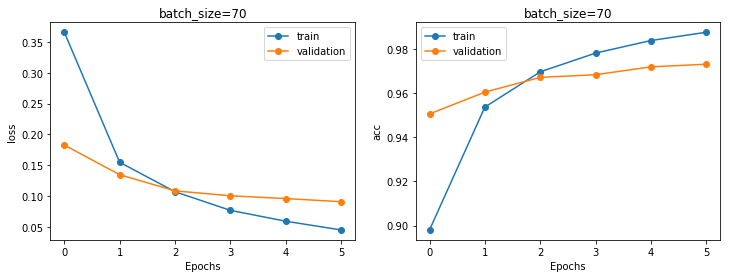

In [21]:
%matplotlib inline
#batch_size_list = np.arange(100,3000,1000)
batch_size_list = [70]
epoch = 6
#batch_size_list = [1000]
for batch_size in batch_size_list:
    history = train(batch_size,epoch= epoch)
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plot_train_history(history, 'loss','val_loss', batch_size)
    plt.subplot(1,2,2)
    plot_train_history(history, 'acc','val_acc', batch_size)

In [32]:
batch_size=70
epoch = 19
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu', kernel_initializer='normal'))
model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epoch, batch_size= batch_size, validation_split=0.2, verbose=0)

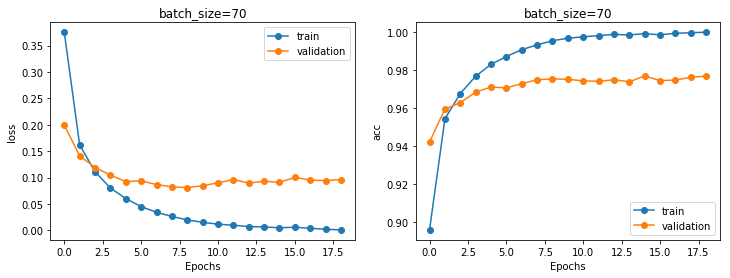

In [33]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss', batch_size)
plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc', batch_size)

In [38]:
answer = model.predict_classes(test)

In [39]:
sample["Label"] = answer

In [40]:
sample = sample.set_index("ImageId",drop = True)

In [41]:
sample.to_csv("answer.csv")

# 極限約在0.97342